# Working with AMIs

## Amazon Machine Image

As stated previously, an Amazon Machine Image (AMI) is a template that contains the software configuration required to launch an instance. This information includes the OS, any preinstalled software, and configuration files required to run the instance. An AMI can be as simple be just the OS or as complex as your needs dictate. 

Amazon Machine Image

As stated previously, an Amazon Machine Image (AMI) is a template that contains the software configuration required to launch an instance. This information includes the OS, any preinstalled software, and configuration files required to run the instance. An AMI can be as simple be just the OS or as complex as your needs dictate. 

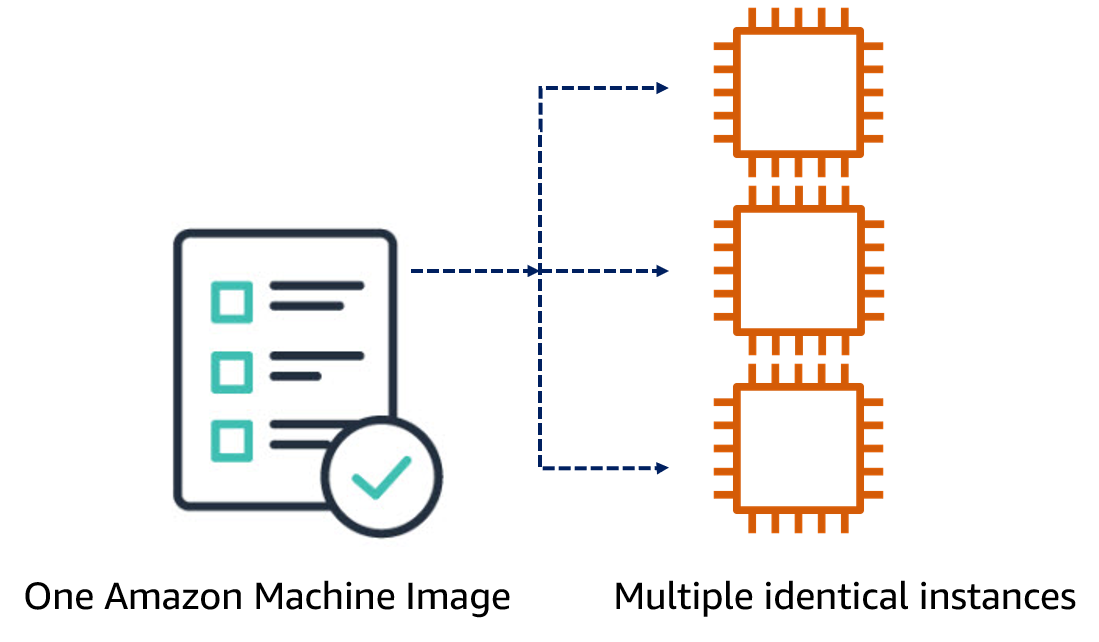

John understands that the marketing project requires multiple identical instances for their game campaign to be successful. To do this, John needs to build a new Amazon EC2 instance, customize that instance with all of the software and configuration settings, and then create the AMI. 

To get started, he needs to look up the main types of AMIs and the important options he'll need to choose as he assembles the information for his AMI. His first objective is to understand his boot mode options.

## Boot modes

When a computer boots, the first software that it runs is responsible for initializing the platform and providing an interface for the OS to perform platform-specific operations. The AMI boot mode parameter signals to EC2 which boot mode to use when launching an instance. 

In EC2, two variants of the boot mode software are supported. To learn more, expand each of the following two categories.

### UEFI
–
Unified Extensible Firmware Interface (UEFI)—Graviton instance types run UEFI by default.



This is a newer boot mode than Legacy BIOS. When you launch an instance where the boot mode is set to UEFI, a key-value store for variables is created. The store can be used by UEFI and the instance OS for storing UEFI variables.



UEFI variables are used by the boot loader and the OS to configure early system startup. Because of the UEFI variables, the OS can manage certain settings of the boot process, like the boot order, or the keys for UEFI Secure Boot.



Warning!

You can only access UEFI variables from within an instance. Anyone who can connect to an instance, and potentially any software running on the instance, can read the variables. You should never store sensitive data, such as passwords or personally identifiable information, in the UEFI variable store.



UEFI Secure Boot builds on the long-standing secure boot process of Amazon EC2, and provides additional defense-in-depth that helps customers secure software from threats that persist across reboots. It ensures that the instance only boots software that is signed with cryptographic keys. The keys are stored in the key database of the UEFI non-volatile variable store. UEFI Secure Boot prevents unauthorized modification of the instance boot flow.

### Legacy BIOS
–
Legacy BIOS—Intel and AMD instance types run on Legacy BIOS by default. 

Legacy BIOS is the original way of booting a system using the BIOS firmware. Older versions of the Windows OS can only use Legacy BIOS where newer versions can support both Legacy BIOS or UEFI. 



It's important to verify which boot mode your AMI OS can support.

The AMI boot mode parameter is optional. For AMIs with no boot mode parameter, the instances launched from these AMIs use the default value of the instance type—UEFI on Graviton and legacy-BIOS on all Intel and AMD instance types.

## Shared and public AMIs

A shared AMI(opens in a new tab) is an AMI that was built and made available for others to use. One of the easiest ways to get started with Amazon EC2 is to use a shared AMI that already has the OS and software components you need. You can then add your own additional content to the instance. With your finalized instance, you can create a new AMI. When you have an AMI built, you can share it publicly or internally within your AWS accounts or AWS Organization(opens in a new tab). To learn more about shared AMIs, visit Shared AMIs(opens in a new tab) on the Amazon Elastic Compute Cloud User Guide.

Because AWS can't vouch for the integrity or security of all publicly shared AMIs, you use a shared public AMI at your own risk. Always treat shared AMIs as you would any foreign code that you might consider deploying in your own data center, and perform the appropriate due diligence. It's a good idea to get an AMI from a trusted source. Public images owned by Amazon have an aliased owner, which appears as 'amazon' in the account field so that you can easily find AMIs from Amazon. Only Amazon can alias their AMIs, this is not something other users can do.

## Considerations before publicly sharing an AMI 

Consider the following details when sharing AMIs with the public. To learn more, expand each of the following five categories.

### Regional resource
–
AMIs are a Regional resource. When you search for a shared AMI (public or private), you must search for it from the same Region from which it is shared. 



To make an AMI available in a different Region, copy the AMI to the Region and then share it.

### AMIs that can't be public
–
If your AMI includes one of the following components, you can't make it public (but you can share the AMI with specific AWS accounts(opens in a new tab)):

- Encrypted volumes

- Snapshots of encrypted volumes

- Product codes

### Sensitive data
–
Avoid exposing sensitive data. To avoid exposing sensitive data when you share an AMI, read the security considerations in Guidelines for shared Linux AMIs(opens in a new tab) and follow the recommended actions.

### Deprecation
–
By default, the deprecation date of all public AMIs is set to two years from the AMI creation date automatically. You can choose to set the deprecation date to be sooner than two years. 



To cancel the deprecation date, or to move the deprecation to a later date, you must make the AMI private by only sharing it with specific AWS accounts.

### Billing
–
You are not billed when your AMI is used by other AWS accounts to launch instances. The accounts that launch instances using the AMI are billed for the instances that they launch.

## Paid AMIs

A paid AMI is an AMI that you can purchase from a developer on the AWS Marketplace. The AWS Marketplace is an online store where you can buy software that runs on AWS, including AMIs that you can use to launch your EC2 instance. The AWS Marketplace AMIs are organized into categories, such as Developer Tools, to help you to find products to suit your requirements. To learn more, visit Paid AMIs(opens in a new tab) in the Amazon Elastic Compute Cloud User Guide.

- Launching an instance from a paid AMI is the same as launching an instance from any other AMI. No additional parameters are required. 
- Billing for the instance is charged according to the rates set by the owner of the AMI, in addition to the standard usage fees for the related web services, for example, the hourly rate for running an m1.small instance type in Amazon EC2. Additional taxes might also apply. 
    - The owner of the paid AMI can confirm whether a specific instance was launched using that paid AMI. 
    - At the end of each month, you receive an email with the amount your credit card has been charged for using any paid or supported AMIs during the month. This bill is separate from your regular Amazon EC2 bill. 


## Launch permissions

The owner of an AMI determines its availability by specifying launch permissions. Launch permissions fall into three categories. 

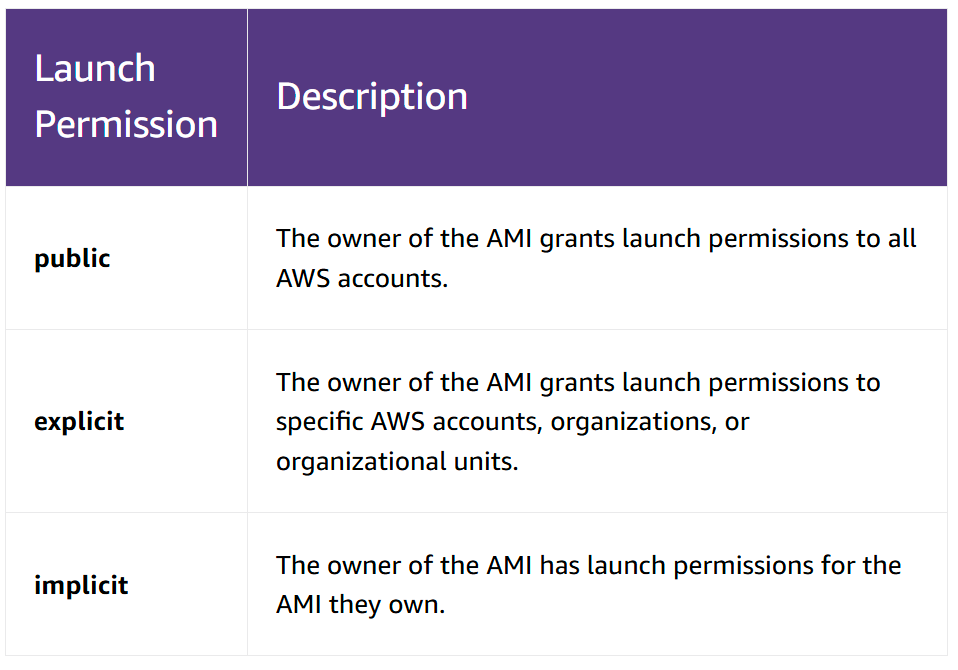



## Share an AMI with specific AWS accounts 

After you have a instance built with the correct OS, software installed, and configuration settings for your IT standards, that instance is referred to as a gold image or gold AMI. You can then use this gold image to launch multiple, identical instances.

An approved gold image helps you to better meet your internal security, compliance, and management requirements because you can build servers from an standardized base OS that meets your internal IT standards. In a large environment, updating the gold image and keeping it updated with security and software patches can be a time consuming process. Because of this, AWS created an easy way for you to build and maintain your gold images called EC2 Image Builder.

## EC2 Image Builder 

EC2 Image Builder simplifies the building, testing, and deployment of virtual machine and container images for use on AWS or on premises. It can significantly reduce the effort of keeping images up-to-date and secure by providing a simple graphical interface, built-in automation, and AWS-provided security settings. With Image Builder, there are no manual steps for updating an image nor do you have to build your own automation pipeline. When software updates become available, Image Builder automatically produces a new image without requiring users to manually initiate image builds. To learn more, visit EC2 Image Builder(opens in a new tab).

Image Builder is offered at no cost, integrates with AWS Organizations, and can share AMIs across accounts based on your existing AMI sharing mechanisms.

## Considerations for sharing AMIs internally

There are some considerations that you should review before sharing AMIs with other, specific AWS accounts. To learn more, expand each of the following six categories.

### No sharing limits
–
There is no limit to the number of AWS accounts with which an AMI can be shared.

### Copying and usage
–
Usage—When you share an AMI, users can only launch instances from the AMI. They can’t delete, share, or modify it. However, after they have launched an instance using your AMI, they can then create an AMI from their instance.

Copying shared AMIs—If users in another account want to copy a shared AMI, you must grant them read permissions for the storage that backs the AMI.

### Tags
–
When you tag public or shared resources, the tags you assign are available only to your AWS account; no other AWS account will have access to those tags. For tag-based access control to shared resources, each AWS account must assign its own set of tags to control access to the resource.

### Encryption and keys
–
You can share AMIs that are backed by unencrypted and encrypted snapshots.

The encrypted snapshots must be encrypted with a customer managed key. You can’t share AMIs that are backed by snapshots that are encrypted with the default AWS managed key. 

If you share an AMI that is backed by encrypted snapshots, you must allow the AWS accounts to use the customer managed keys that were used to encrypt the snapshots. 

### Regional resource
–
AMIs are a regional resource. When you share an AMI, it is only available in that Region. To make an AMI available in a different Region, copy the AMI to the Region and then share it. 

### Billing
–
You are not billed when your AMI is used by other AWS accounts to launch instances. The accounts that launch instances using the AMI are billed for the instances that they launch.

